# Kitchen Sink: Impact Charts and EBM

This is a first look at impact charts and EBM impact on the 
same chart. No attempt to optimize either approach in any
way other than whatever they do out of the box was attempted.

### Construct a Kitchen Sink Scenario

This is a data set with features $x_i$ whose impact in a variety
of shapes, such as linear, quadratic, exponential, and sinusoidal. There are 
also some features $c_i$ that do not contribute to the target at 
all. And there is some normally distributed noise on top of all of 
that.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

In [2]:
N = 250

In [3]:
M = 6

In [4]:
S = 4

In [5]:
SIGMA = 10.0

In [6]:
FEATURE_DISTRIBUTION = "normal"

In [7]:
SEED = 1779

In [8]:
experiment = ise.KitchenSinkExperiment(
    m=M, s=S, sigma=SIGMA, seed=SEED, n=N, feature_distribution=FEATURE_DISTRIBUTION
)

In [9]:
tags, scenario = next(experiment.scenarios())

## Fit an EBM from interpret

Based on the code example at https://interpret.ml/docs/ebm.html. 

In [10]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider

set_visualize_provider(InlineProvider())

In [11]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_data = scenario.training_data()

In [14]:
X = df_data[scenario.x_prime_cols()]
y = df_data[scenario.y_col()]

In [15]:
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=SEED
)

In [16]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor()

In [17]:
ebm_global = ebm.explain_global()

## Plot both the EBM and the SHAP-based impact charts

We will plot them on the same axes to get some visual comparisons.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


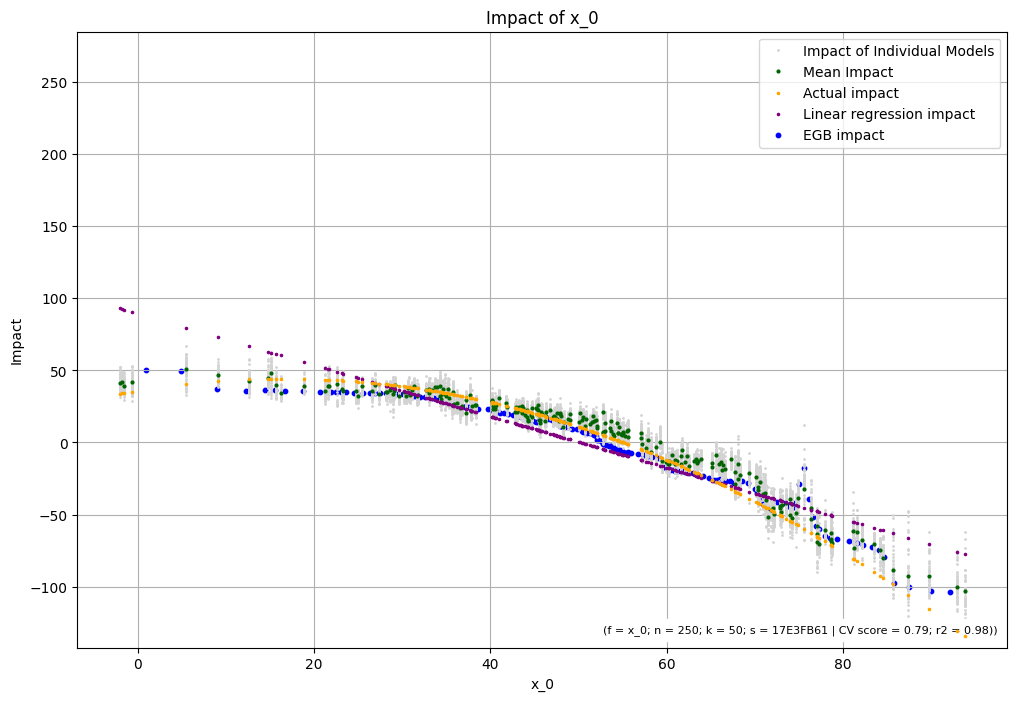

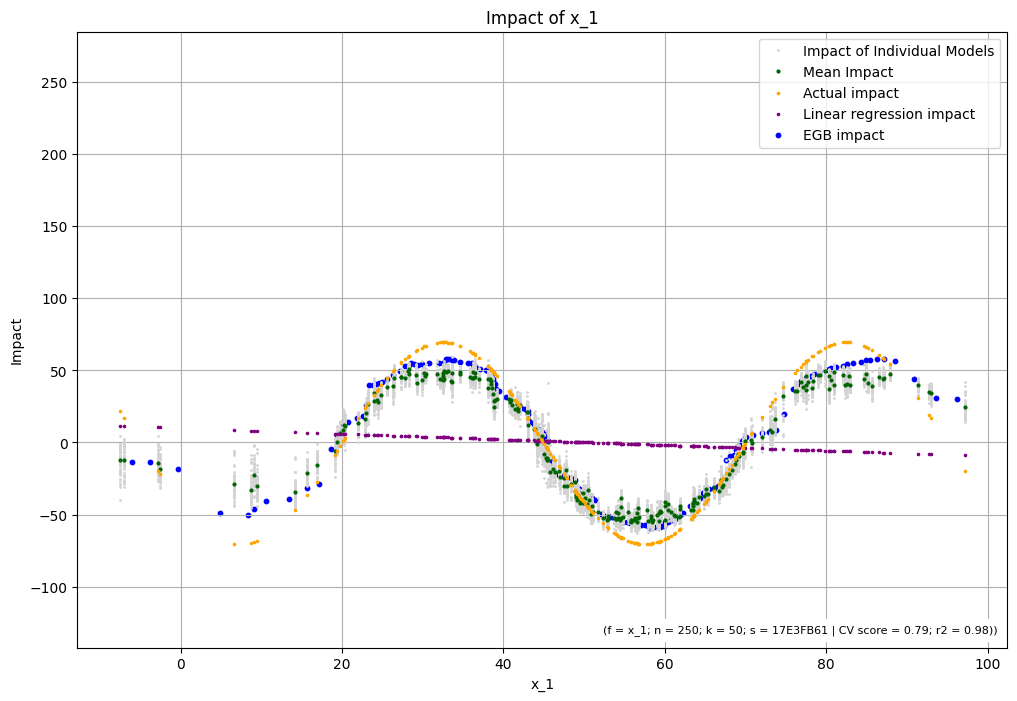

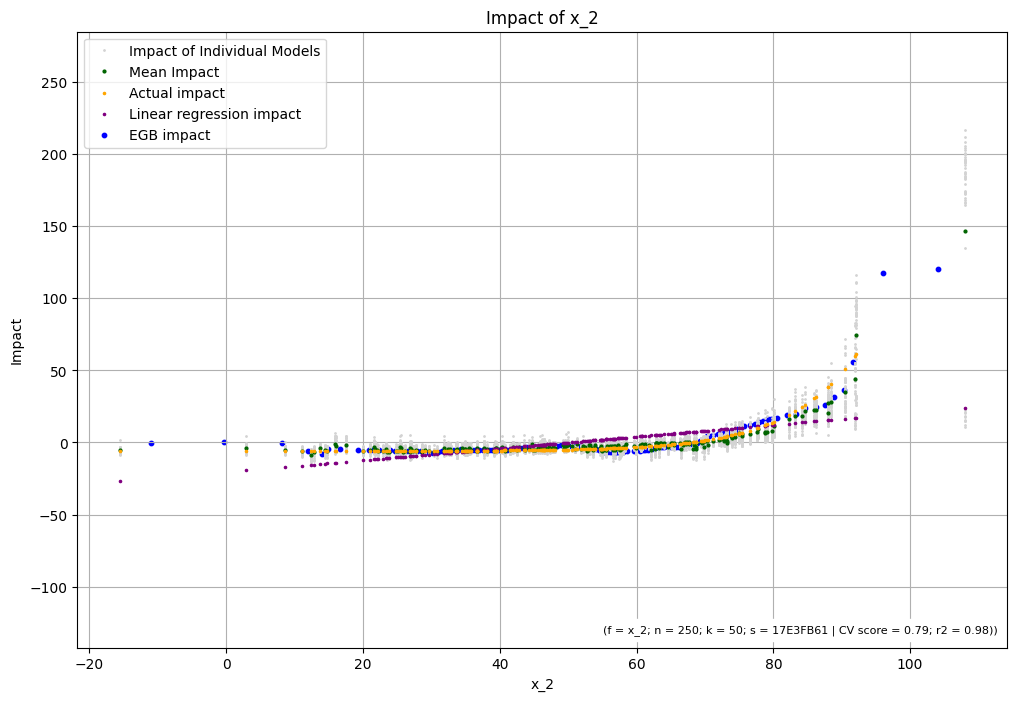

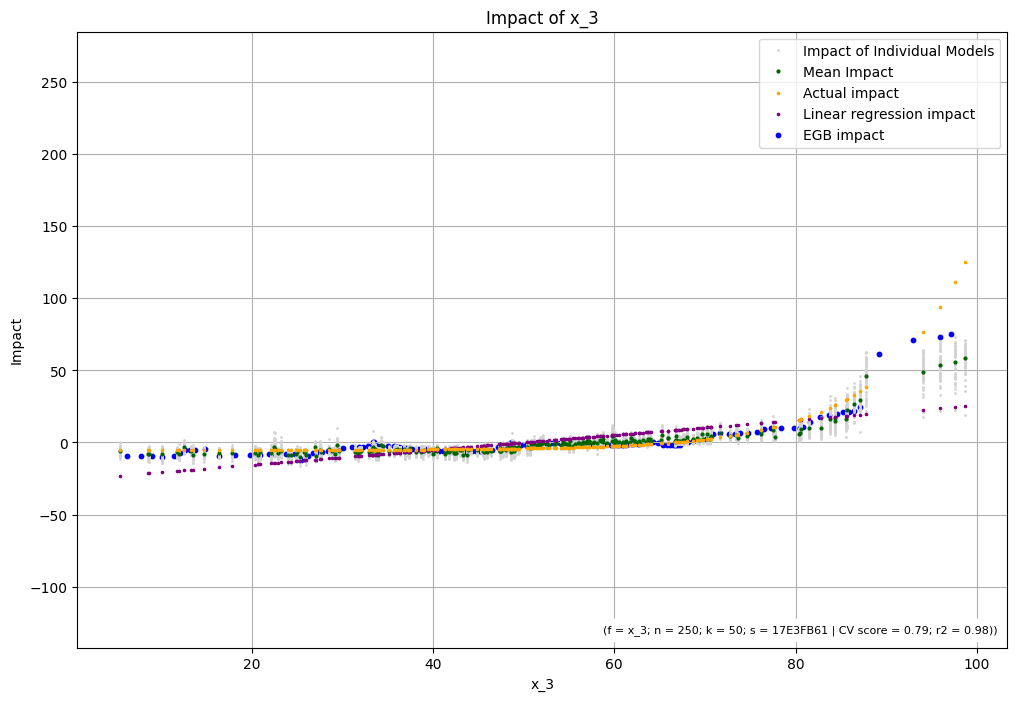

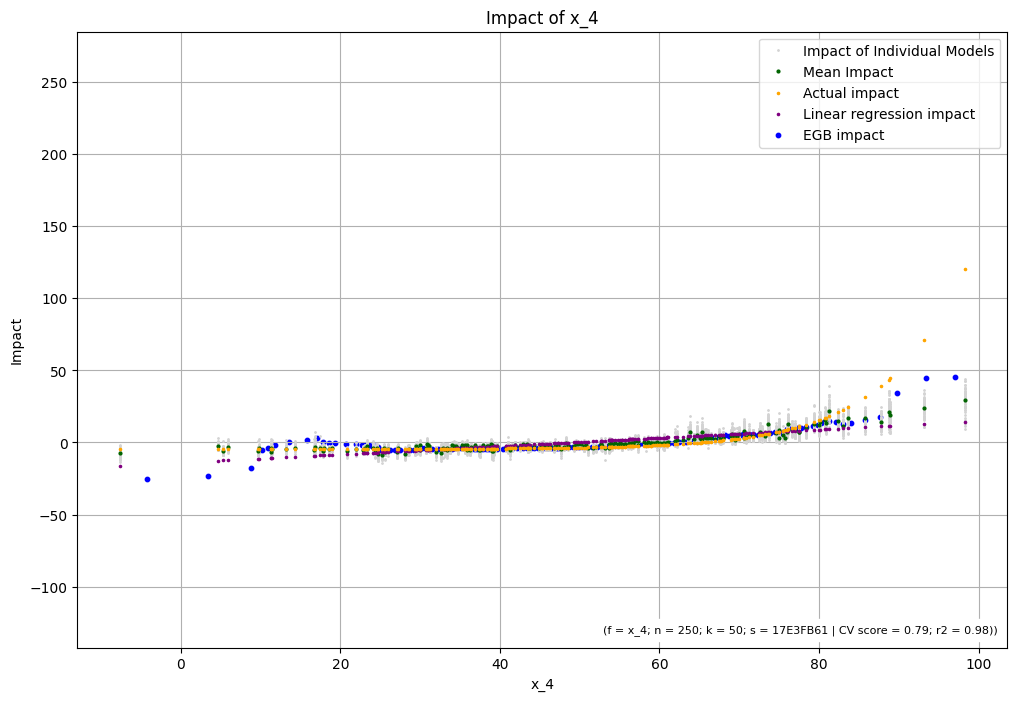

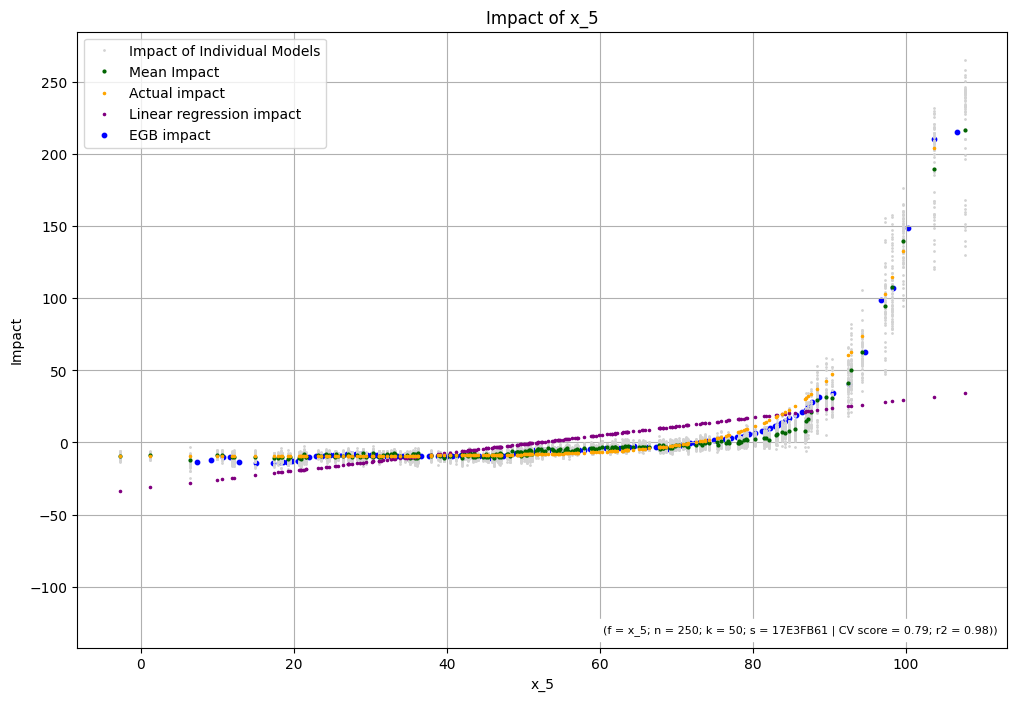

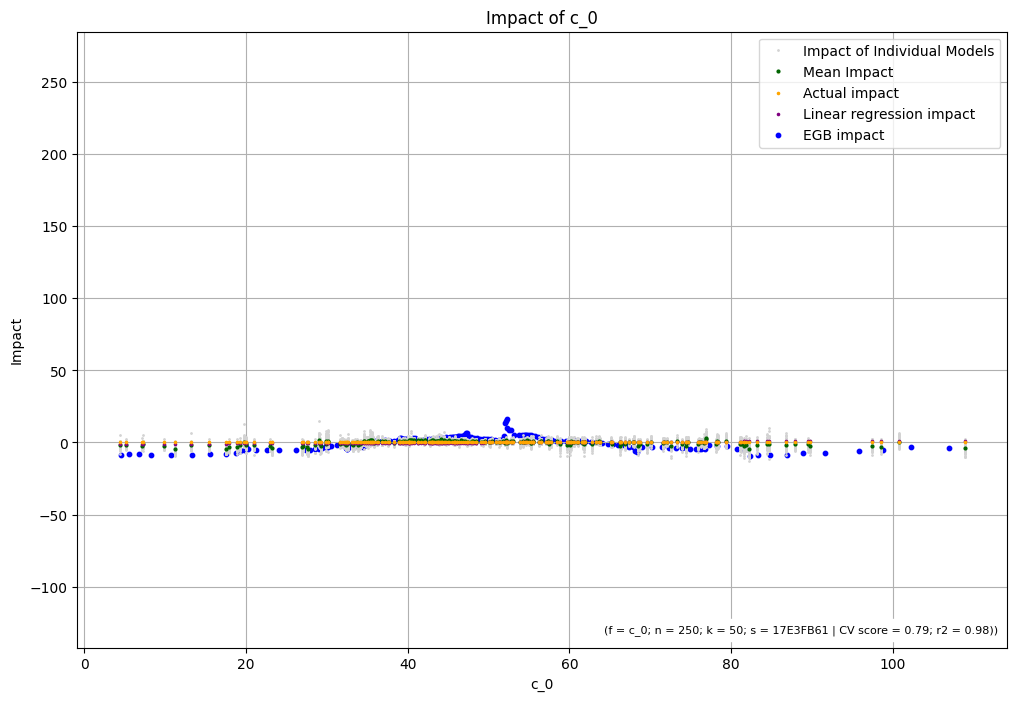

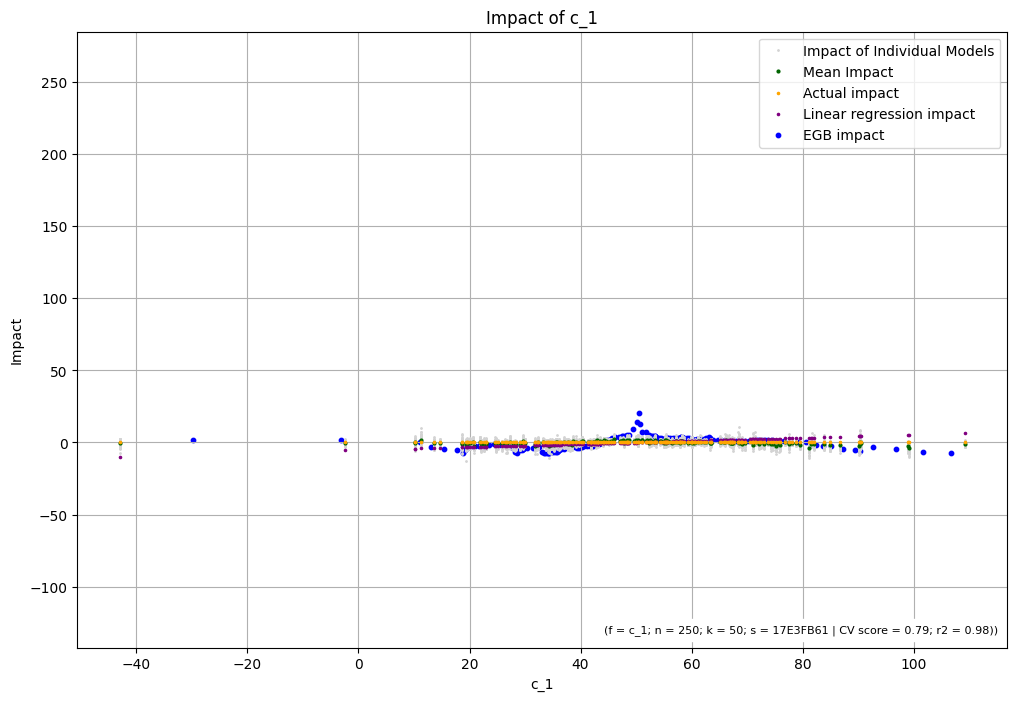

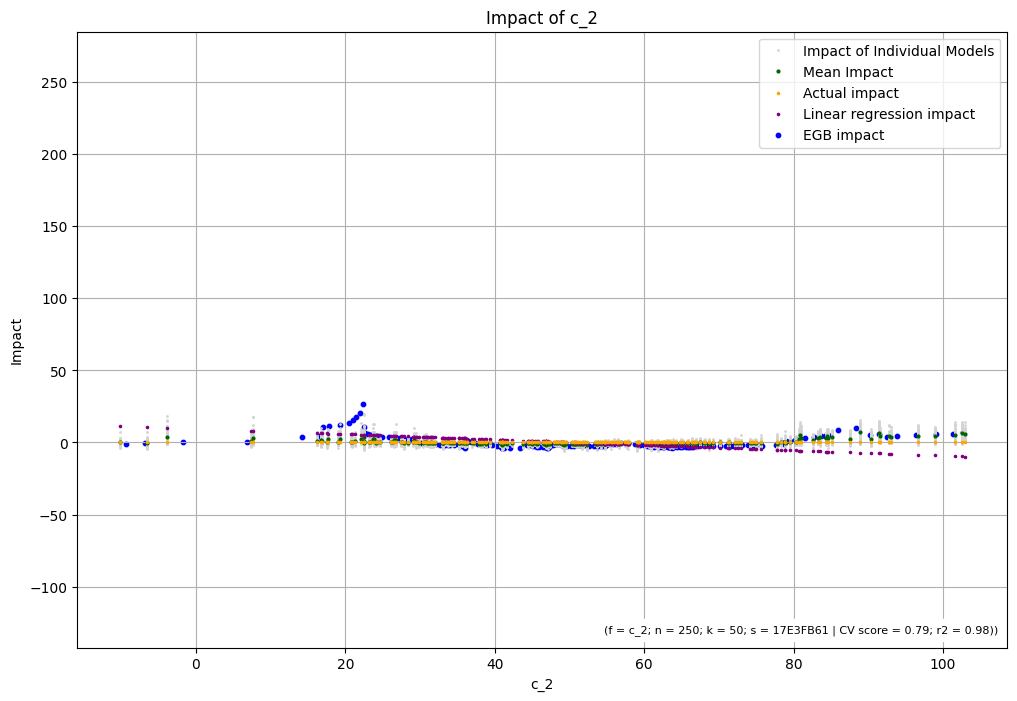

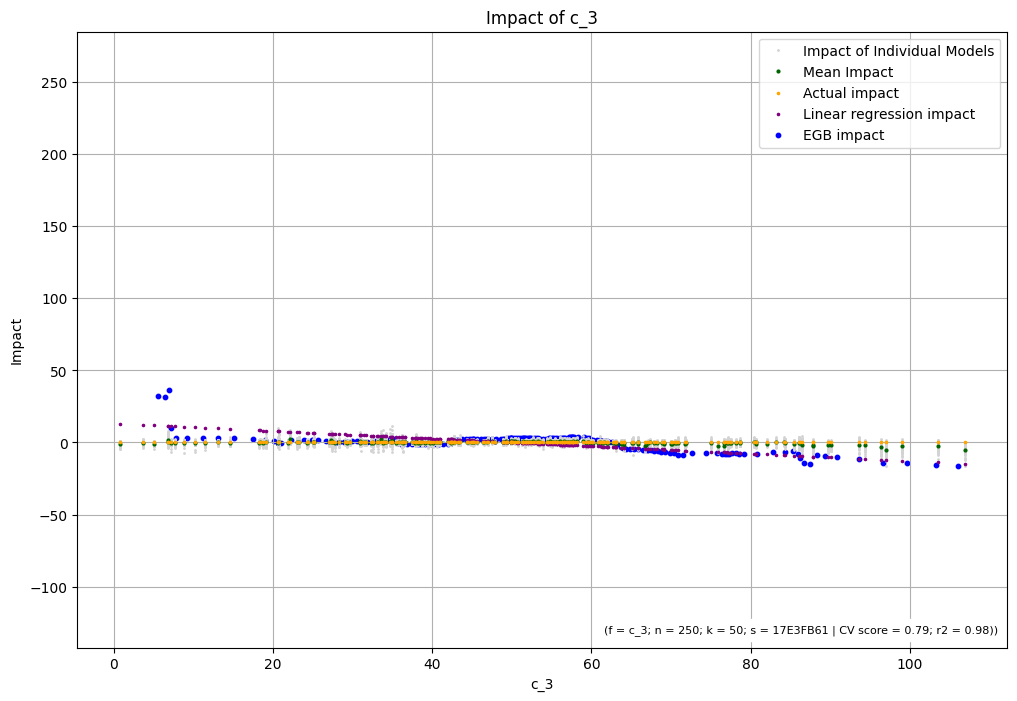

In [18]:
impact_charts = scenario.model_impact_charts(linreg_overlay=True)

for feature, (fig, ax) in impact_charts.items():
    idx = ebm_global.feature_names.index(feature)

    scores = ebm_global.data(idx)["scores"]
    names = ebm_global.data(idx)["names"]

    centers = [(a + b) / 2 for a, b in zip(names[1:], names[:-1])]
    ax.scatter(centers, scores, label="EGB impact", s=10, color="blue")

    ax.legend()